In [1]:
import pandas as pd
from pathlib import Path

In [2]:
CSV_PATH = Path(
    "/home/spai0534/rfp-rag-assistant-main/"
    "src/dataset/result_20251218/ragas_result.csv"
)

In [ ]:
df = pd.read_csv(CSV_PATH)
df.head(1)

,id,user_input,retrieved_contexts,response,reference,context_recall,context_precision,faithfulness,answer_relevancy
0,golden_dataset_001,대학 관련 사업의 공고번호와 사업명은 무엇인가요?,['20241001798\t한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사...,"대학 관련 사업은 다음과 같습니다. ① 공고번호 20241001798, 사업명은 '...","대학 관련 사업에는 한영대학교, 한국연구재단 대학사업, 고려대학교, 서울시립대학교,...",1.0,1.0,0.888889,0.82066


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
required_columns = [
    "id",
    "user_input",
    "retrieved_contexts",
    "response",
    "reference",
    "context_recall",
    "context_precision",
    "faithfulness",
    "answer_relevancy"
]

for col in required_columns:
    if col not in df.columns:
        df[col] = None  # 없는 컬럼은 NaN으로 생성

df = df[required_columns]
df.head(1)

,id,user_input,retrieved_contexts,response,reference,context_recall,context_precision,faithfulness,answer_relevancy
0,golden_dataset_001,대학 관련 사업의 공고번호와 사업명은 무엇인가요?,['20241001798\t한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사...,"대학 관련 사업은 다음과 같습니다. ① 공고번호 20241001798, 사업명은 '...","대학 관련 사업에는 한영대학교, 한국연구재단 대학사업, 고려대학교, 서울시립대학교,...",1.0,1.0,0.888889,0.82066


In [13]:
df = df.rename(columns={
    "user_input": "question",
    "retrieved_contexts": "contexts",
    "response": "answer",
    "reference": "ground_truth"
})

df.head(1)

,id,question,contexts,answer,ground_truth,context_recall,context_precision,faithfulness,answer_relevancy
0,golden_dataset_001,대학 관련 사업의 공고번호와 사업명은 무엇인가요?,['20241001798\t한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사...,"대학 관련 사업은 다음과 같습니다. ① 공고번호 20241001798, 사업명은 '...","대학 관련 사업에는 한영대학교, 한국연구재단 대학사업, 고려대학교, 서울시립대학교,...",1.0,1.0,0.888889,0.82066


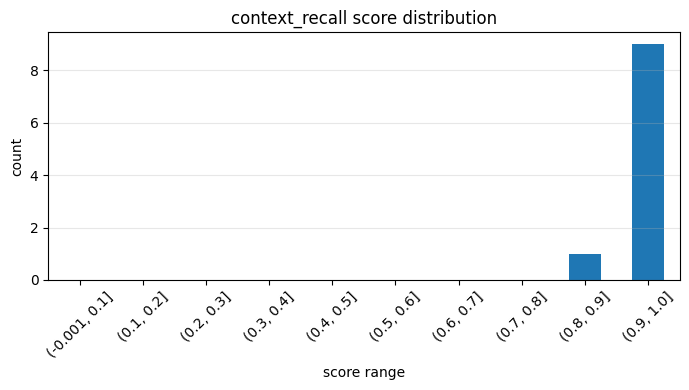

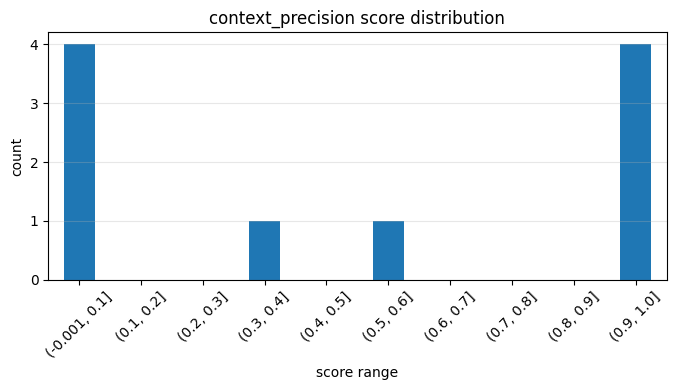

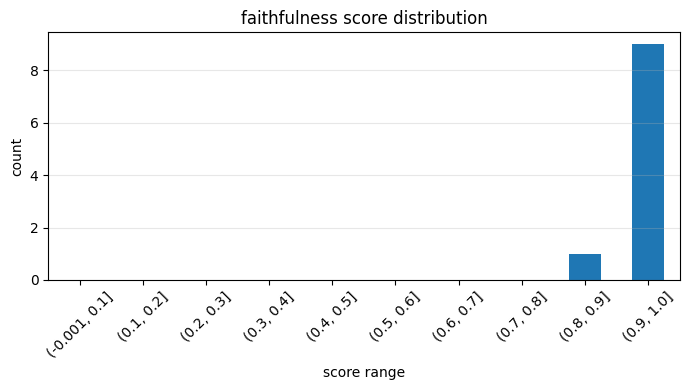

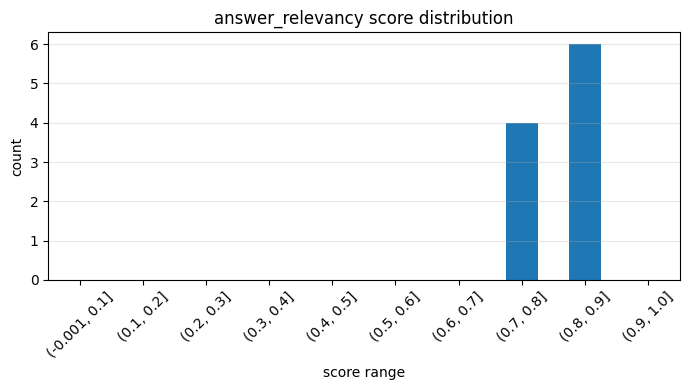

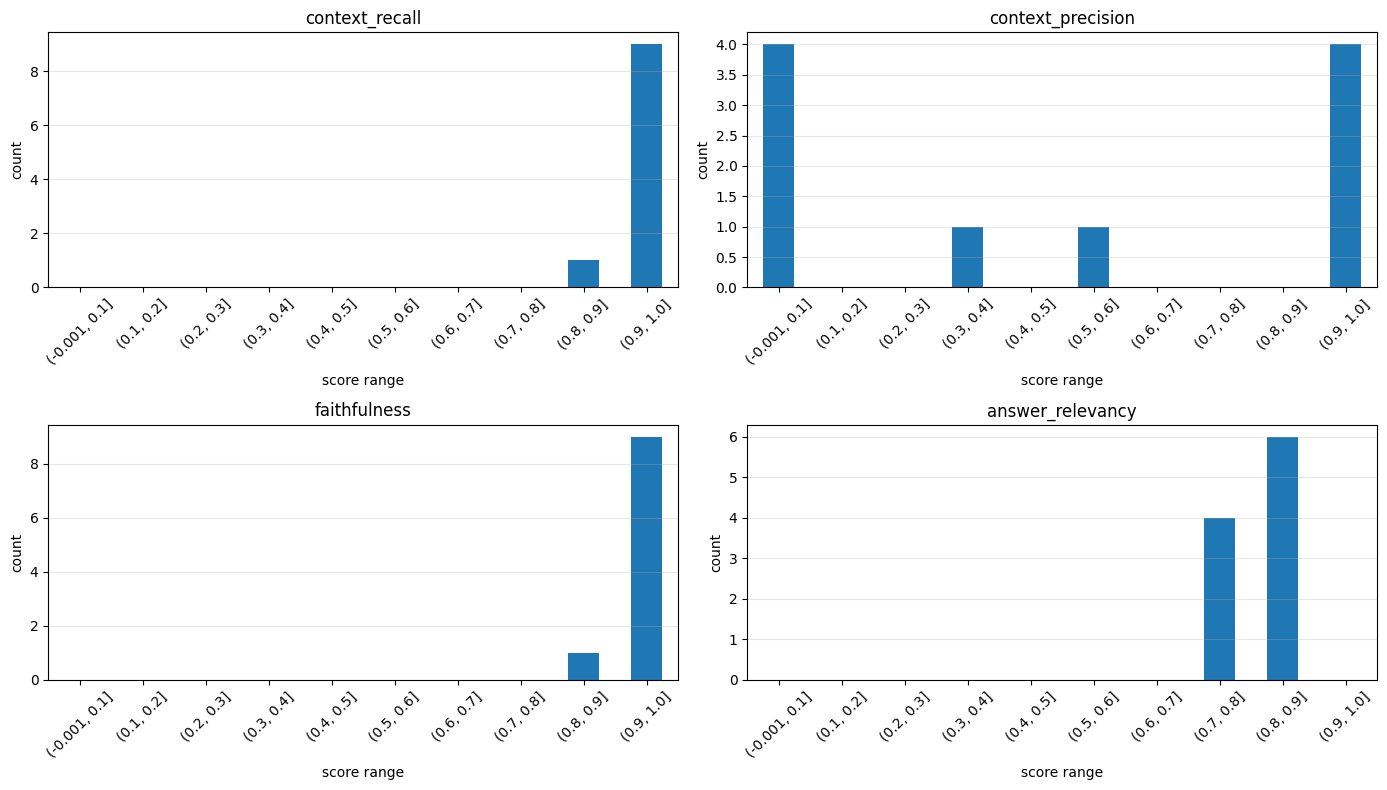

In [16]:
import matplotlib.pyplot as plt
import numpy as np

csv_path = "/home/spai0534/rfp-rag-assistant-main/src/dataset/result_20251218/ragas_result.csv"
df = pd.read_csv(csv_path)

metrics = [
    "context_recall",
    "context_precision",
    "faithfulness",
    "answer_relevancy"
]

df[metrics].head()

bins = np.linspace(0, 1, 11)  # 0.0~1.0, 0.1 간격
bin_labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]

for metric in metrics:
    # binning
    binned = pd.cut(df[metric], bins=bins, include_lowest=True)
    counts = binned.value_counts().sort_index()

    plt.figure(figsize=(7, 4))
    counts.plot(kind="bar")

    plt.title(f"{metric} score distribution")
    plt.xlabel("score range")
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    binned = pd.cut(df[metric], bins=bins, include_lowest=True)
    counts = binned.value_counts().sort_index()

    counts.plot(kind="bar", ax=ax)
    ax.set_title(metric)
    ax.set_xlabel("score range")
    ax.set_ylabel("count")
    ax.grid(axis="y", alpha=0.3)
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()




In [18]:
mean_df = (
    df[metrics]
    .mean()
    .reset_index()
    .rename(columns={
        "index": "metric",
        0: "mean_score"
    })
)

mean_df.T

,0,1,2,3
metric,context_recall,context_precision,faithfulness,answer_relevancy
mean_score,0.983333,0.493333,0.988889,0.798143
